In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'DB_and_Azure'))
import sql_db_functions as SQLf

### get data from server

In [2]:
conn, cursor = SQLf.sql_db_functions.connect_sql()

In [3]:
query = "SELECT product_characteristics.id, Brand_id , Detail, Summary, Brand FROM product_characteristics INNER JOIN Products ON product_characteristics.Brand_id = Products.Brand_Prod_id ;"
cursor.execute(query)

# Fetch the rows
rows = cursor.fetchall()
rows[0]

(161,
 1,
 '    *Type: Shirt\n    *Fit: Regular fit\n    *Sleeve style: Long sleeve\n    *Neckline: Collared\n    *Material: Silk\n    *Formality: Business Casual\n    *Season: Autumn, Spring, Summer\n    *Colors: Navy (70%), White (30%)\n    *Texture: Smooth\n    *Transparency: Opaque\n    *Details and Embellishments: Buttons\n    *Shape: Fitted\n    *Length: Hip-length\n    *Collar Style: Button-down\n    *Sleeve Style: Long\n    *Patterns: Geometric\n    *Patterns placement: All-over\n    *Fluidity of fabric: High\n    *Fabric weight: Light\n    *Pocket Presence: No\n    *Pocket placement: Not applicable\n    *Pocket size: Not applicable\n    *Breathability: High\n    *Occasion Suitability: Business Casual, Formal\n    *Lapel: Not applicable',
 'The item is a Gucci silk shirt featuring an optical GG monogram print. It is designed with a regular fit and features long sleeves with buttoned cuffs. The neckline is a classic pointed collar, adding a touch of formality. The material used 

In [4]:
conn, cursor = SQLf.sql_db_functions.connect_sql()

In [5]:
query = "SELECT Brand_id, base64 FROM product_img ;"
cursor.execute(query)

# Fetch the rows
rows_img = cursor.fetchall()
#rows_img

In [6]:
len(rows_img)

212

In [7]:
SQLf.sql_db_functions.close_connection_db(conn=conn,cursor=cursor)

### organize data

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(rows ,columns= ['Id','prod_id','descripcion', 'Summary','Brand'])

In [10]:
df.head()

,Id,prod_id,descripcion,Summary,Brand
0,161,1,*Type: Shirt\n *Fit: Regular fit\n *...,The item is a Gucci silk shirt featuring an op...,Gucci
1,162,2,*Type: Shirt \n*Fit: Regular fit \n*Sleeve s...,The Gucci cotton Oxford GG shirt with an optic...,Gucci
2,163,3,*Type: Cropped blouse \n*Fit: Regular fit \n...,The Gucci top is a cropped blouse made of luxu...,Gucci
3,164,4,*Type: Shirt \n*Fit: Regular fit \n*Sleeve s...,The garment in question is a Gucci Camicia in ...,Gucci
4,165,5,*Type: Shirt \n*Fit: Regular fit \n*Sleeve s...,The garment in question is a Gucci cotton popl...,Gucci


In [11]:
df['descripcion'] = df['descripcion'].str.replace('\n*', ' / ')
df['descripcion'] = df['descripcion'].str.replace(r'\s+', ' ')
df['descripcion'] = df['descripcion'].str.replace('*', ' ')

df.head(5)

,Id,prod_id,descripcion,Summary,Brand
0,161,1,Type: Shirt\n Fit: Regular fit\n ...,The item is a Gucci silk shirt featuring an op...,Gucci
1,162,2,Type: Shirt / Fit: Regular fit / Sleeve s...,The Gucci cotton Oxford GG shirt with an optic...,Gucci
2,163,3,Type: Cropped blouse / Fit: Regular fit /...,The Gucci top is a cropped blouse made of luxu...,Gucci
3,164,4,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci Camicia in ...,Gucci
4,165,5,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci cotton popl...,Gucci


In [12]:
df['Complete_description'] = df['Summary'] + ' /' + "Brand: " + df['Brand'] + " /" + df['descripcion']
df.head()

,Id,prod_id,descripcion,Summary,Brand,Complete_description
0,161,1,Type: Shirt\n Fit: Regular fit\n ...,The item is a Gucci silk shirt featuring an op...,Gucci,The item is a Gucci silk shirt featuring an op...
1,162,2,Type: Shirt / Fit: Regular fit / Sleeve s...,The Gucci cotton Oxford GG shirt with an optic...,Gucci,The Gucci cotton Oxford GG shirt with an optic...
2,163,3,Type: Cropped blouse / Fit: Regular fit /...,The Gucci top is a cropped blouse made of luxu...,Gucci,The Gucci top is a cropped blouse made of luxu...
3,164,4,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci Camicia in ...,Gucci,The garment in question is a Gucci Camicia in ...
4,165,5,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci cotton popl...,Gucci,The garment in question is a Gucci cotton popl...


In [13]:
documents = df['Complete_description'].tolist()
id = df['Id'].astype('str').tolist()
metadata = [{"source": id} for id in df['Id'].astype('str').tolist()]

In [14]:
df_image = pd.DataFrame(rows_img, columns=['prod_id', 'base64'])

In [15]:
df_image.head(10)

,prod_id,base64
0,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
1,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
2,55,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
3,82,None
4,83,None
5,83,None
6,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
7,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
8,2,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
9,2,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."


In [16]:
del rows, rows_img

### Get images 

In [17]:
import base64
from io import BytesIO
from PIL import Image

In [18]:
def base64_to_image(base64_string):
    # Remove the data URI prefix if present
    if "data:image" in base64_string:
        base64_string = base64_string.split(",")[1]

    # Decode the Base64 string into bytes
    image_bytes = base64.b64decode(base64_string)
    return image_bytes

In [19]:
def create_image_from_bytes(image_bytes):
    # Create a BytesIO object to handle the image data
    image_stream = BytesIO(image_bytes)

    # Open the image using Pillow (PIL)
    image = Image.open(image_stream)
    return image

In [20]:
df_image.iloc[200].base64

'data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAjKBwgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1qiiigAopaSgApaKKACiiigAooooAKKKKAFopKWgAooooAKKKWgAo70lLQAUlLRQAUUUUAFFFFABRRRQAUUUUAFLSUtABS0lLQAUtJS0AHejiiigAooooAKKKKACiij0oABRRRQAUUUUAFFL

In [21]:
image_bytes = base64_to_image(df_image.iloc[200].base64)

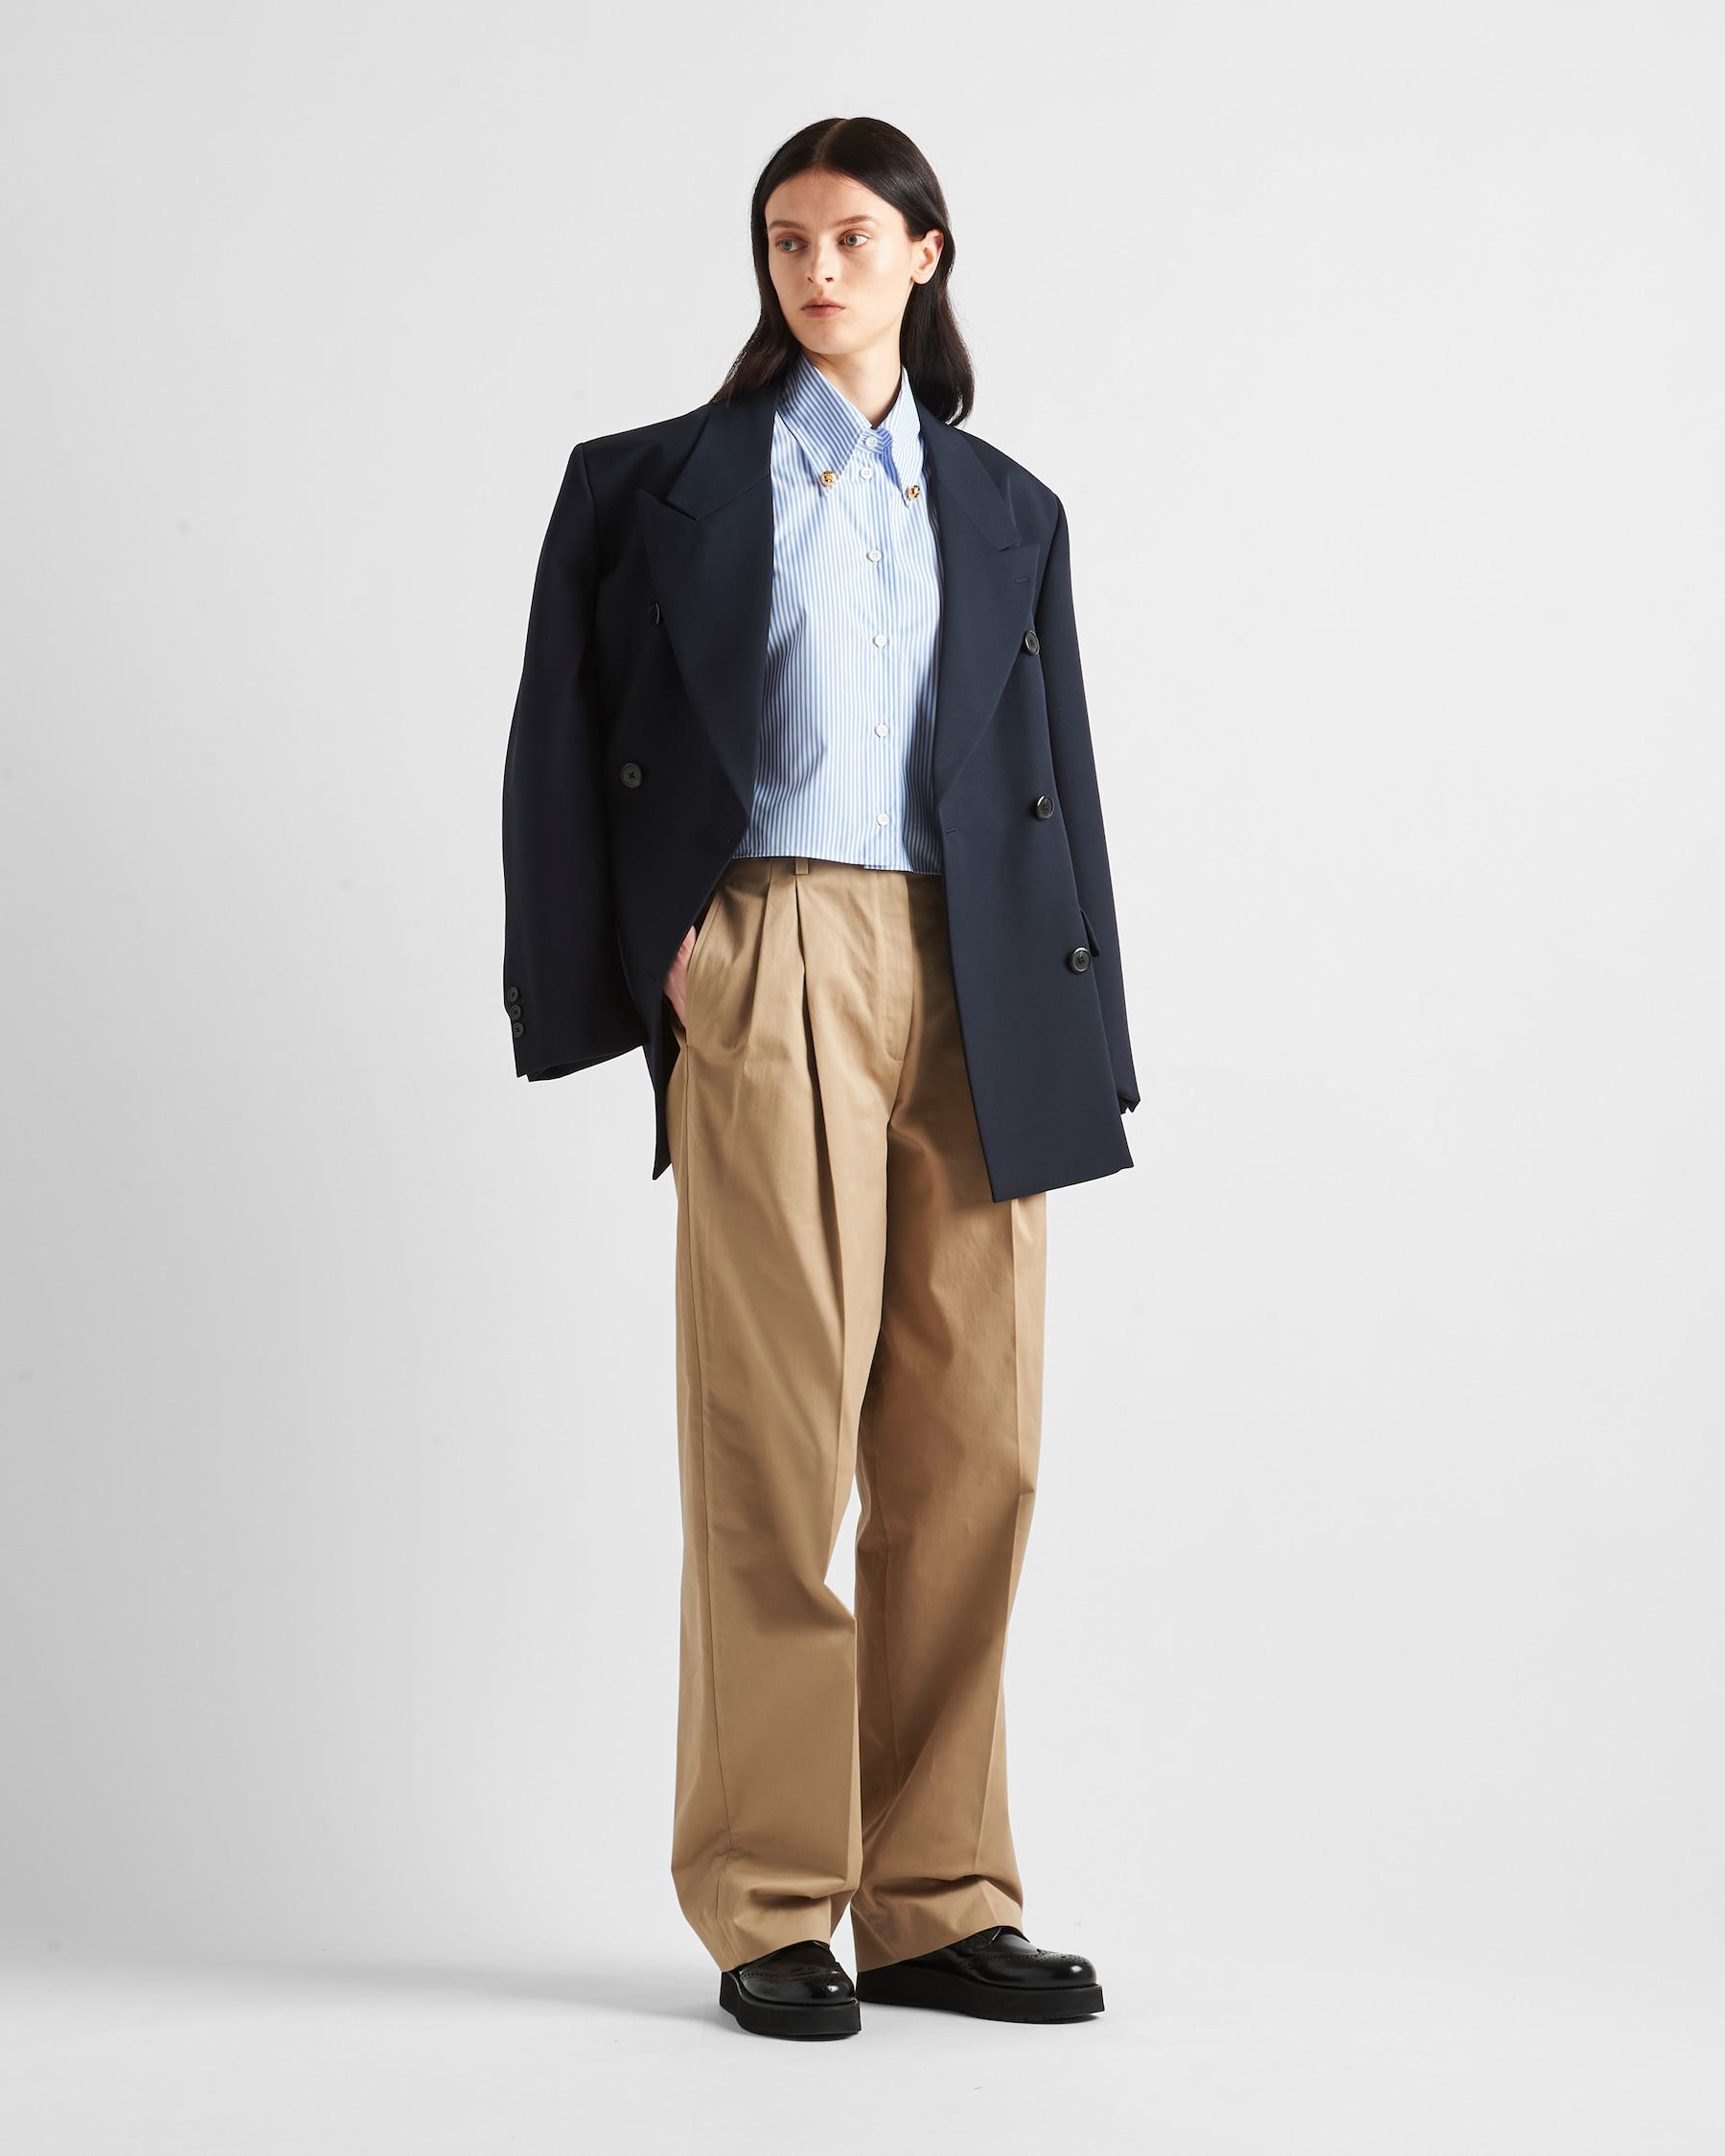

In [22]:
create_image_from_bytes(image_bytes=image_bytes)

### Testing embeddings

In [23]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [24]:
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

In [25]:
embedding_function = SentenceTransformerEmbeddings(model_name='all-mpnet-base-v2')

c:\Users\juand\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
c:\Users\juand\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\juand\anaconda3\Lib\site-packages\transformers\utils\generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\

In [26]:
persist_directory = 'chroma-db-full-description'

In [27]:
store = InMemoryStore()
id_key = 'doc_id'

### load text 

In [28]:
df_image.head(3)

,prod_id,base64
0,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
1,1,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
2,55,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."


In [29]:
df = pd.merge(
            df,
            df_image.groupby('prod_id')['base64'].apply(list).reset_index(),
            on='prod_id'
        )

In [30]:
df.head(2)

,Id,prod_id,descripcion,Summary,Brand,Complete_description,base64
0,161,1,Type: Shirt\n Fit: Regular fit\n ...,The item is a Gucci silk shirt featuring an op...,Gucci,The item is a Gucci silk shirt featuring an op...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
1,162,2,Type: Shirt / Fit: Regular fit / Sleeve s...,The Gucci cotton Oxford GG shirt with an optic...,Gucci,The Gucci cotton Oxford GG shirt with an optic...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."


In [31]:
df.prod_id = df.prod_id.astype(int)
df.sort_values('prod_id',ascending=True,inplace=True)
df.reset_index(drop=True, inplace= True)
df.prod_id = df.prod_id.astype('string')
df.head(5)

,Id,prod_id,descripcion,Summary,Brand,Complete_description,base64
0,161,1,Type: Shirt\n Fit: Regular fit\n ...,The item is a Gucci silk shirt featuring an op...,Gucci,The item is a Gucci silk shirt featuring an op...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
1,162,2,Type: Shirt / Fit: Regular fit / Sleeve s...,The Gucci cotton Oxford GG shirt with an optic...,Gucci,The Gucci cotton Oxford GG shirt with an optic...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
2,163,3,Type: Cropped blouse / Fit: Regular fit /...,The Gucci top is a cropped blouse made of luxu...,Gucci,The Gucci top is a cropped blouse made of luxu...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
3,164,4,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci Camicia in ...,Gucci,The garment in question is a Gucci Camicia in ...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
4,165,5,Type: Shirt / Fit: Regular fit / Sleeve s...,The garment in question is a Gucci cotton popl...,Gucci,The garment in question is a Gucci cotton popl...,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."


In [32]:
vectorstore = Chroma(
    collection_name="multi_modal_rag", embedding_function=embedding_function
)

In [33]:
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
    search_kwargs={"k":5}
)

In [34]:
doc_ids = df.prod_id

texts = [
    Document(
        page_content= df.iloc[i].Complete_description, metadata={id_key:df.iloc[i].prod_id}
    )
    for i in df.index
]

In [35]:
retriever.vectorstore.add_documents(texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

In [36]:
docs = retriever.invoke(
    "Gucci"
)

In [37]:
docs

[Document(page_content="The Gucci top is a cropped blouse made of luxurious silk, designed with a fluid and lightweight fabric that enhances breathability, making it ideal for summer and beach club settings. It features a relaxed fit with short sleeves, and a round neckline that complements its casual elegance. The shirt showcases a bold and intricate pattern, with the signature Gucci horsebit print interspersed with vertical stripes. The color palette includes a deep crimson red, complemented by off-white and black stripe details, creating a striking visual contrast. The texture is smooth and silky, lending a sophisticated sheen to the fabric. The top's length is cropped, hitting above the waist, which adds to its breezy and informal vibe. There are no pockets, collars, or lapels, maintaining a streamlined and sleek silhouette. Overall, this top embodies a chic yet relaxed style, perfect for casual summer gatherings or upscale beach events. /Brand: Gucci / Type: Cropped blouse   / Fit

In [189]:
df.iloc[1].Complete_description

'The Gucci cotton Oxford GG shirt with an optical effect features a tailored fit that accentuates a modern silhouette, making it suitable for both formal and semi-formal occasions. This long-sleeve shirt showcases a classic button-down front and a standard collar, contributing to its timeless appeal. Crafted from high-quality Oxford cotton, the material offers a medium weight, providing comfort and breathability suitable for all seasons. The shirt prominently displays the iconic GG monogram in a repeated pattern, creating an optical illusion effect that adds a contemporary twist to the classic fabric. The primary color of the shirt is a rich navy blue, which serves as the base for the intricate light blue GG pattern. This pattern is consistently placed across the entire garment, ensuring a cohesive and polished look. Additional details include a single chest pocket, perfectly sized and positioned for both functionality and style. The fabric has a smooth texture with minimal transparenc

In [38]:
vectorstore.persist()

c:\Users\juand\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  warn_deprecated(
